# Contents
## Importing Libraries and Data
## Exploring Relationships 
### &emsp; Correlation matrix heatmap
### &emsp; Scatterplots
### &emsp; Pair plot
### &emsp; Categorical plot
## Questions Revisited
### &emsp; How is salary affected by years of experience?
### &emsp; How is salary affected by years at the company?
### &emsp; How many survey respondents are at their first job?
## Hypotheses
## Extra analysis (on the analyst_salaries dataset)
---

# Importing Libraries and Data

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [2]:
# Checking version of matplotlib to see if I need to update

matplotlib.__version__

'3.7.0'

In [3]:
# Turning project folder into string

path = r'C:\Users\davau\OneDrive - College of the Sequoias\Career Foundry\Data Immersion\Achievement 6 (Python and Tableau)\Job Market for Data Analytics'

In [4]:
# Importing stem_salaries_clean.csv

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'stem_salaries_clean.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,race,education
0,0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN,NaN
1,1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN,NaN
3,3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN,NaN
4,4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Exploring Relationships

## Correlation matrix heatmap

In [6]:
# Creating a subset of df for my correlation coefficient matrix
# Only numerical variables that I'm interested in 

sub = df[['totalyearlycompensation','yearsofexperience','yearsatcompany']]

In [7]:
sub.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany
0,127000,1.5,1.5
1,100000,5.0,3.0
2,310000,8.0,0.0
3,372000,7.0,5.0
4,157000,5.0,3.0


In [8]:
# Creating a correlation matrix using pandas

sub.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany
totalyearlycompensation,1.000000,0.422811,0.165652
yearsofexperience,0.422811,1.000000,0.522609
yearsatcompany,0.165652,0.522609,1.000000


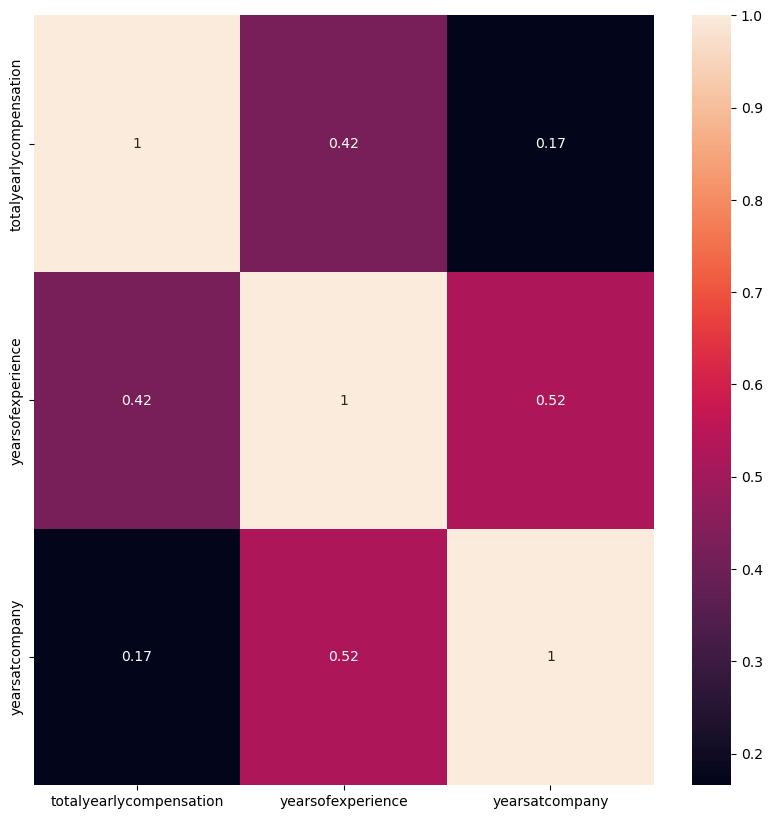

In [9]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating the correlation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

The strongest correlation is between 'yearsofexperience' and 'yearsatcompany', followed closely by the correlation between 'yearsofexperience' and 'totalyearlycompensation'.  Both correlations are moderate.  So it seems (unsurprisingly) that the more experience you have, the higher your pay.  It also seems that the more experience you have, the longer you've been at your current job.  

There is not much of a correlation between 'yearsatcompany' and 'totalyearlycompensation'; however, the correlation coefficient is positive, suggesting that at the very least, we wouldn't expect a loyal employee's salary to decrease over time.

## Scatterplots

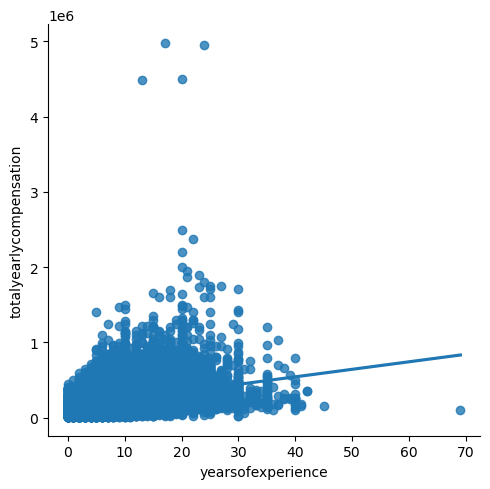

In [10]:
# Creating a scatterplot for 'yearsofexperience' and 'totalyearlycompensation'

sns.lmplot(x = 'yearsofexperience', y = 'totalyearlycompensation', data = sub)

First, let's note that someone answered that they had 69 years of experience, which is almost certainly a joke.  Next, we should note the four outliers making 4-5 million dollars.  These extreme values make the chart difficult to analyze (due to the need to scale the axes in such a way as to accommodate them).  However, we can definitely say that salary tends to increase with experience.

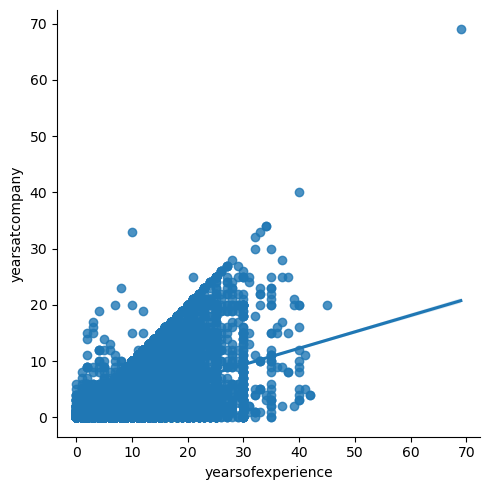

In [11]:
# Creating a scatterplot for 'yearsofexperience' and 'yearsatcompany'

sns.lmplot(x = 'yearsofexperience', y = 'yearsatcompany', data = sub)

We've got a strong relationship here.  There are a few individuals who claim to have been at their company for more years than they have experience, which does not make a ton of sense, unless they had a dramatic change in department within the same company.  It's also worth pointing out that it seems a large number of individuals have been with the same company for their entire career (note the strong presence of data points along the line y=x).  Again we see the person who said they have 69 years of experience.

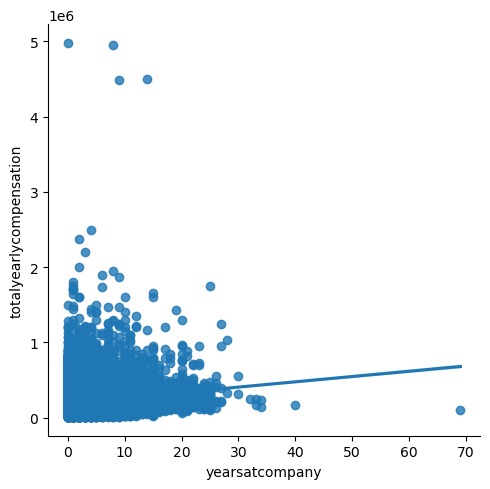

In [12]:
# Creating a scatterplot for 'yearsatcompany' and 'totalyearlycompensation'

sns.lmplot(x = 'yearsatcompany', y = 'totalyearlycompensation', data = sub)

Again we see the same outliers.  The trend line doesn't look too much less steep than the trend line comparing 'yearsofexperience' and 'totalyearlycompensation', but the difference (and the reason we have a small correlation coefficient for this comparison) is that here, there seem to be a lot more people starting out in a company in a higher-paying job.  This makes sense, as these people likely already had experience and were hired from outside their current company to fill some kind of senior position.

## Pair Plot

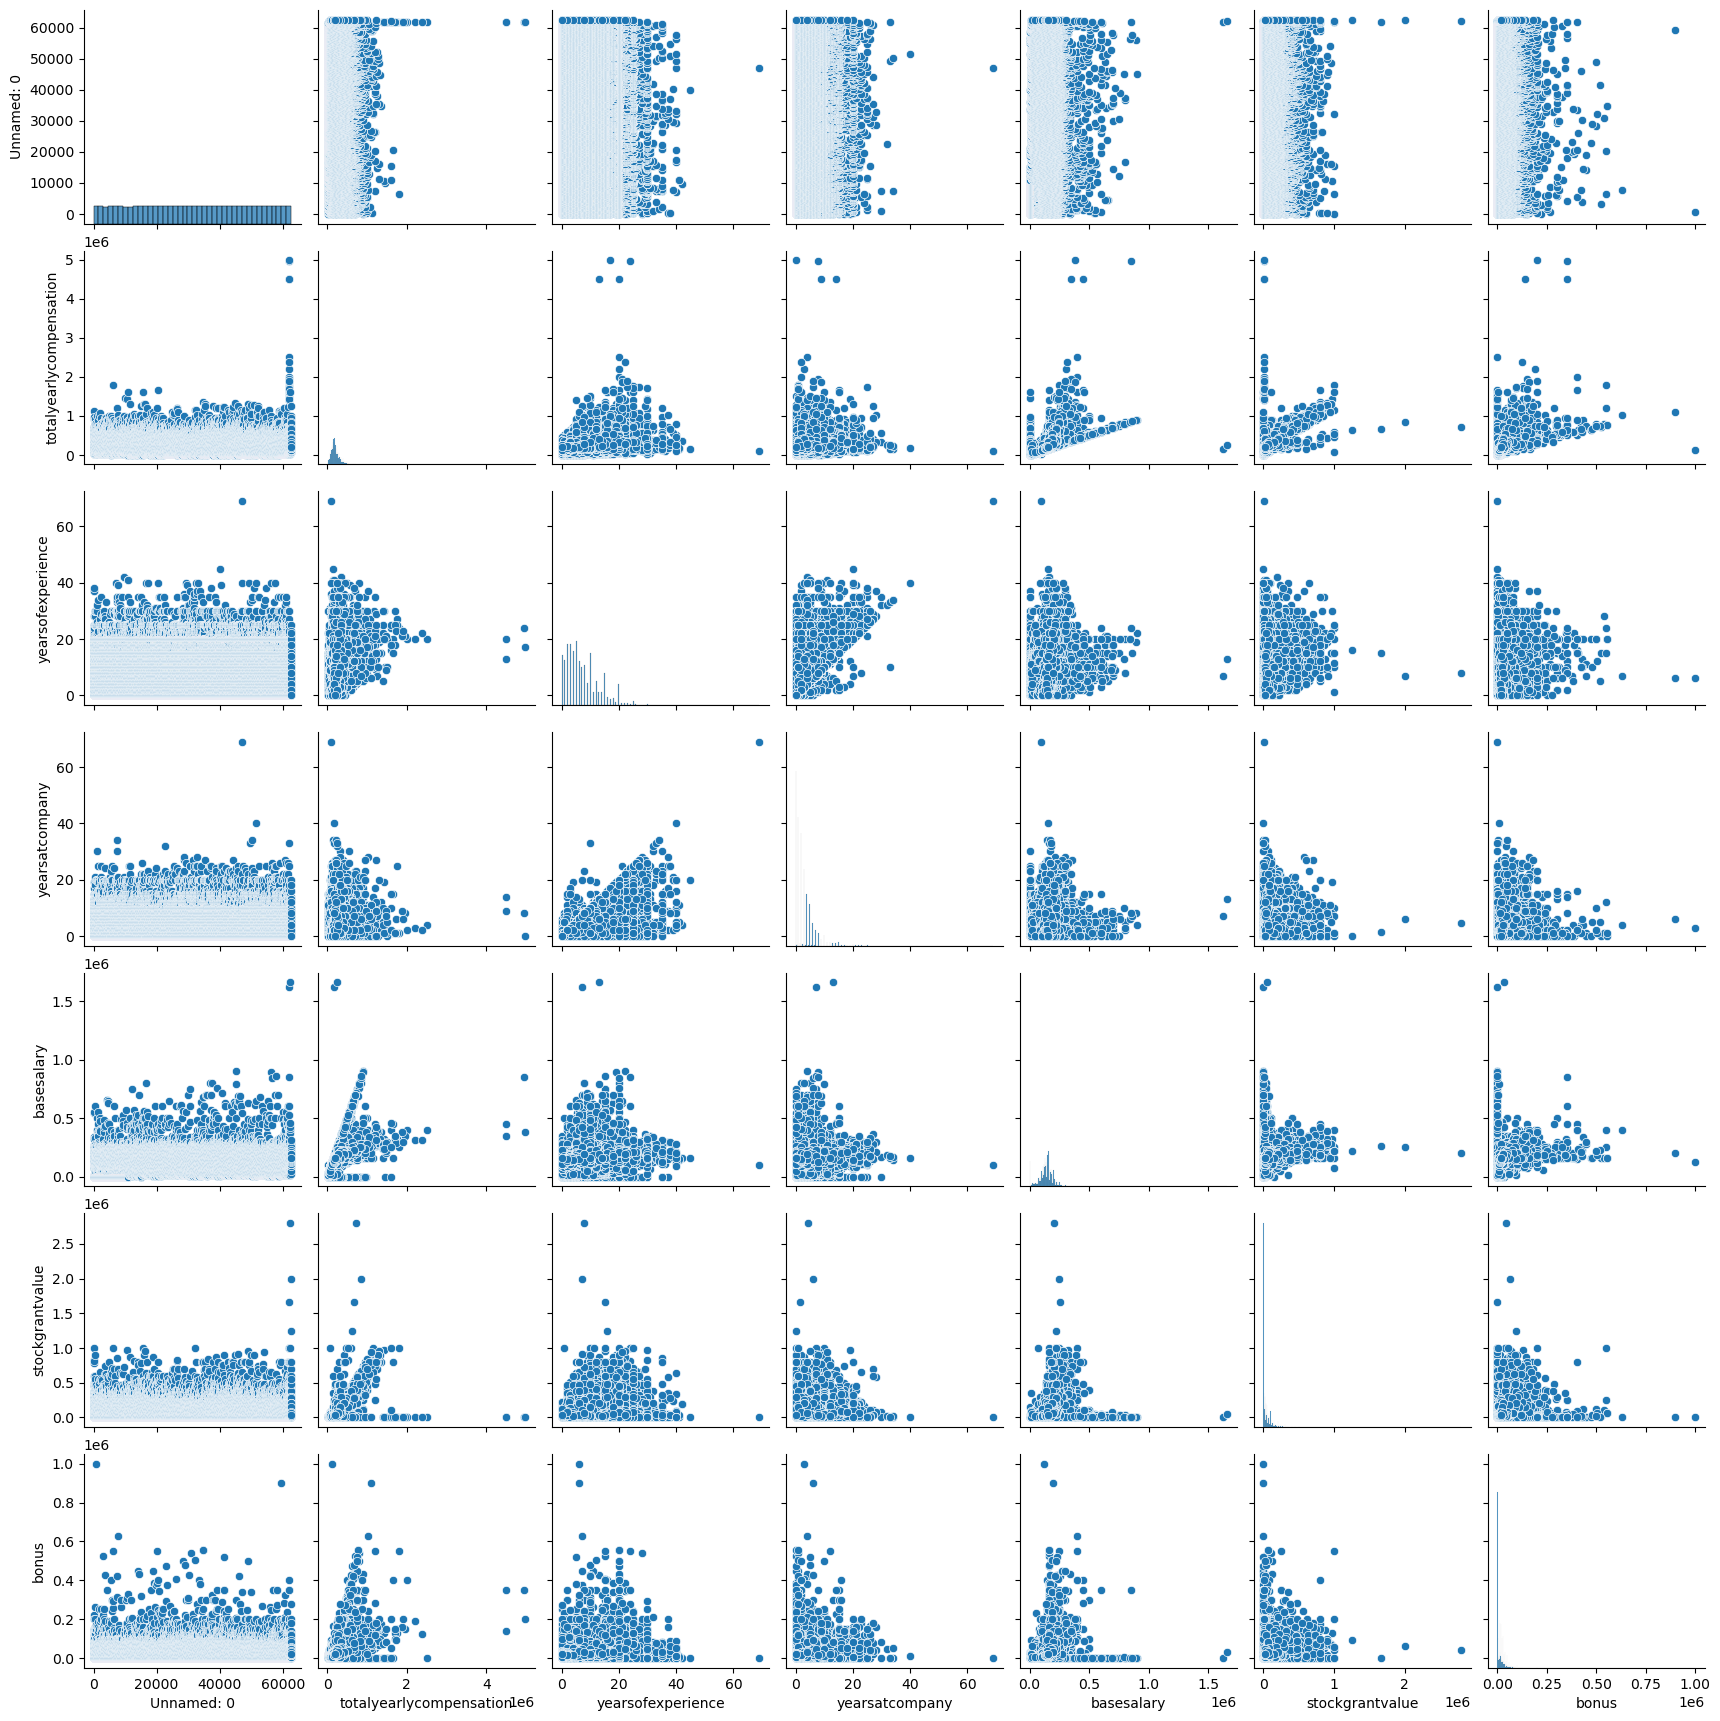

In [13]:
# Creating a pair plot for the entire data set 

pp_stem = sns.pairplot(df)

This is a bit difficult to see.  Let narrow it down again.

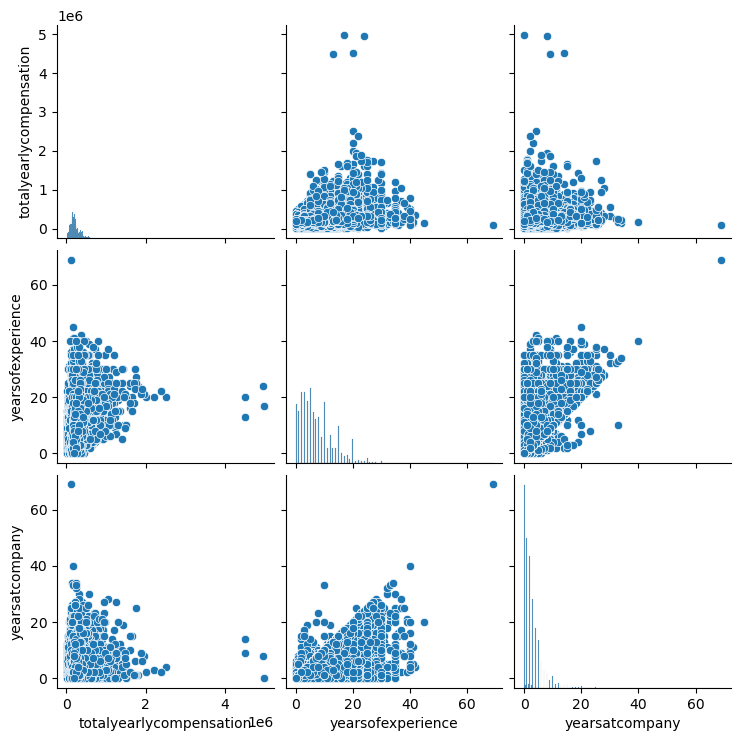

In [14]:
# Creating a pair plot for the subset 

pp_stem_sub = sns.pairplot(sub)

This only makes things a little better, as I still have to contend with the outliers.  Still, I can comment that the vast majority of employees have been at their companies for fewer than 10 years.  A decided majority also have fewer than 10 years of experience overall.  Both distributions are skewed right.  As for 'totalyearlycompensation', the vast majority of employees make under $500,000.  We can't even see on the graph the outliers who make much more than that, which is why the histogram appears so small here.

## Categorical plot

Let's split 'totalyearlycompensation' up by 'yearsofexperience'.  To do this, I'll look first at a histogram of 'yearofexperience' to get a sense for the categories I should create.

<Axes: xlabel='yearsofexperience', ylabel='Count'>

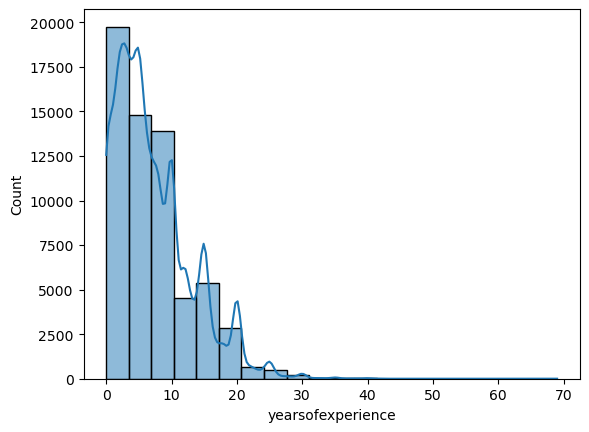

In [15]:
# Histogram of 'yearsofexperience' for whole df

sns.histplot(df['yearsofexperience'], bins = 20, kde = True)

Ok, now I will create the categories.  0-3 years will be labeled 'little experience', 3-10 years will be labeled 'moderate experience', 10-20 years will be labeled 'high experience', and 20+ will be labeled 'extreme experience'.

In [16]:
df.loc[df['yearsofexperience'] < 3, 'experience_level'] = 'little experience'

In [17]:
df.loc[(df['yearsofexperience'] >= 3) & (df['yearsofexperience'] < 10), 'experience_level'] = 'moderate experience'

In [18]:
df.loc[(df['yearsofexperience'] >= 10) & (df['yearsofexperience'] < 20), 'experience_level'] = 'high experience'

In [19]:
df.loc[df['yearsofexperience'] >= 20, 'experience_level'] = 'extreme experience'

In [20]:
# Checking the counts for the categories I just created

df['experience_level'].value_counts(dropna = False)

moderate experience    29429
high experience        15597
little experience      14225
extreme experience      3347
Name: experience_level, dtype: int64

([<matplotlib.axis.XTick at 0x176a3946aa0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70')])

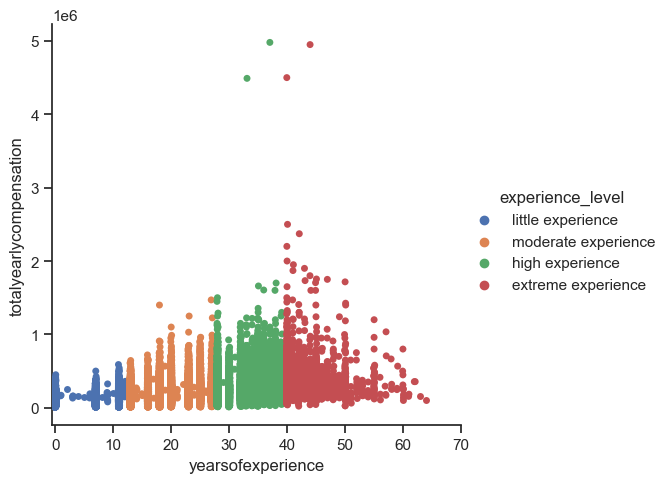

In [27]:
# Creating a categorical plot comparing 'yearsofexperience' to 'totalyearlycompensation' 
# using the experience categories created above

sns.set(style='ticks')
catplot_stem = sns.catplot(x='yearsofexperience', y='totalyearlycompensation', hue='experience_level', data=df)
plt.xticks([0,10,20,30,40,50,60,70],[0,10,20,30,40,50,60,70])

To be honest, the colors don't add a lot to our understanding here.  Compensation increases as experience increases.  Note, though, that among those with 'extreme experience,' the trend is opposite!

# Questions revisited

## How is salary affected by years of experience?

Answer: As experience increases, so does salary.  There is a moderately strong positive linear correlation between these variables.

Further questions: What is the effect size of experience on salary?  That is, what is the slope of the best-fit line?

## How is salary affected by years at the company?

Answer: There is not a strong correlation between these variables.  It seems that salary is not affected much at all by years at the company.

Further questions: Are some companies better at rewarding loyal employees than others? 

## How many survey respondents are at their first job (in the field)?

Answer: While I can't give a number based on the analysis I've done here, what I can say is that there is a large number of people whose years of experience match their years on the job, even among individuals who have been at their job for many years.  This indicates that there is a group of people who tend to stay with the same company for a large portion of their career.  We'll call them "loyal employees."

Further questions: What percentage of employees are "loyal employees?"  Does this percentage change from company to company?  How do the salaries of "loyal employees" compare to the salaries of others?

# Hypotheses

Hypothesis: The average salaries of the four groups defined in this notebook (little experience, moderate experience, high experience, extreme experience) increase as experience level increases.  That is, salary(little) < salary (moderate) < salary (high) < salary (extreme).

Hypothesis: There is not a difference in the propensity of companies to reward loyal employees.  That is, the percentage of employees who are loyal will be roughly the same from company to company.

Hypothesis: Loyal employees have a larger average salary than non-loyal employees.

# Extra (info on the analyst_salaries dataset)

In [28]:
# Importing analyst_salaries_clean

df_an = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'analyst_salaries_clean.csv'), index_col = False)

In [29]:
df_an.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_country,remote_ratio,company_country,company_size
0,0,2023,SE,FT,Data Scientist,258000,US,0,US,M
1,1,2023,SE,FT,Data Scientist,202000,US,0,US,M
2,2,2023,SE,FT,Data Engineer,186600,US,100,US,M
3,3,2023,SE,FT,Data Engineer,116500,US,100,US,M
4,4,2023,SE,FT,Data Engineer,220000,US,0,US,M


In [30]:
# Creating a subset

sub_an = df_an[['work_year','salary_in_usd','remote_ratio']]

In [31]:
# Creating a correlation matrix using pandas

sub_an.corr()

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.222020,-0.218118
salary_in_usd,0.222020,1.000000,-0.095919
remote_ratio,-0.218118,-0.095919,1.000000


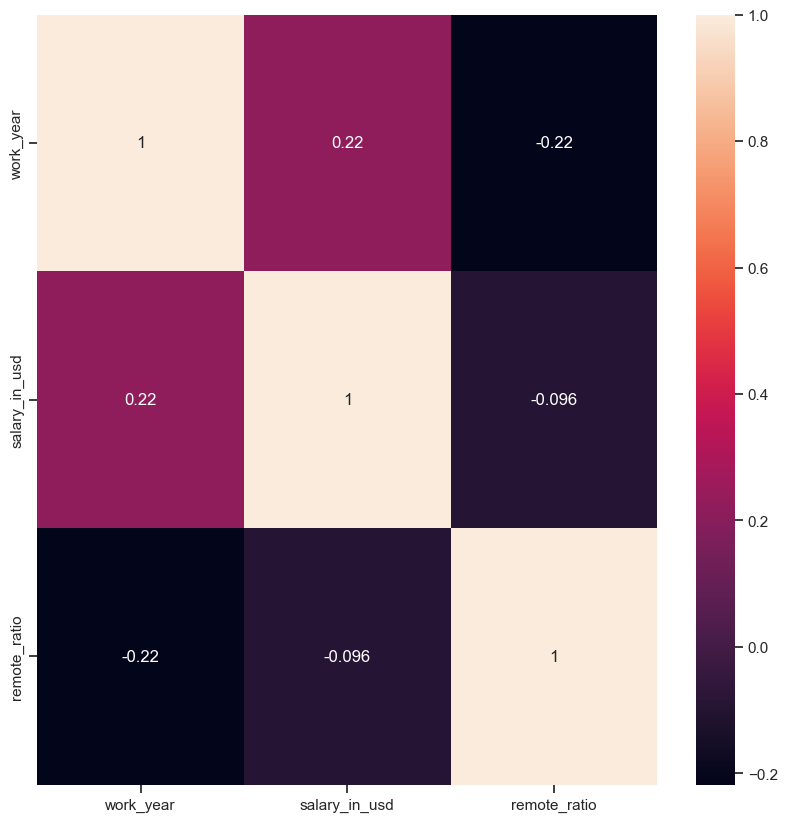

In [32]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating the correlation heatmap in seaborn
corr_an = sns.heatmap(sub_an.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

Not much of a difference in salary whether remote or not.

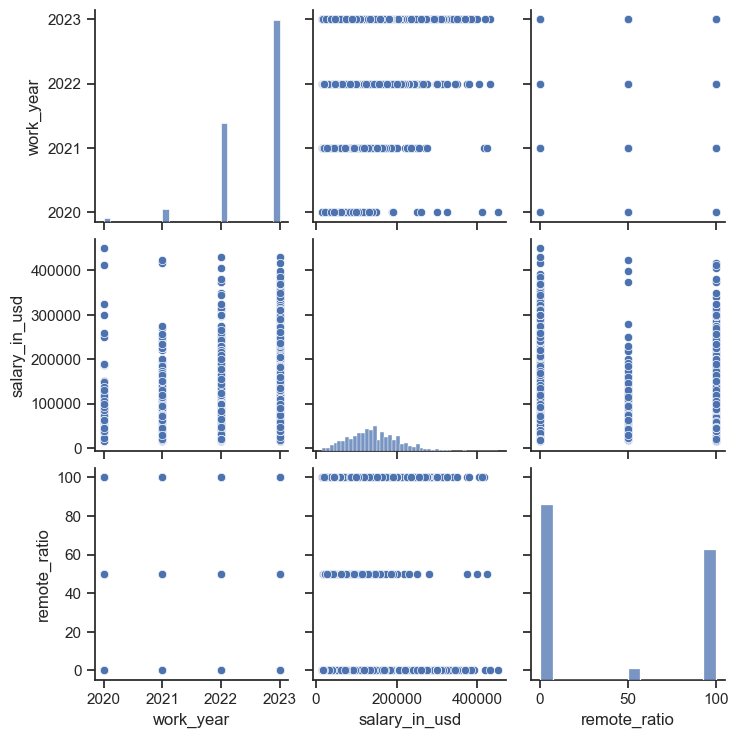

In [34]:
# Creating a pair plot for subset 

pp_an = sns.pairplot(sub_an)

Number of respondents has increased with time.  A good number of people are working remotely.

<Axes: xlabel='salary_in_usd', ylabel='Count'>

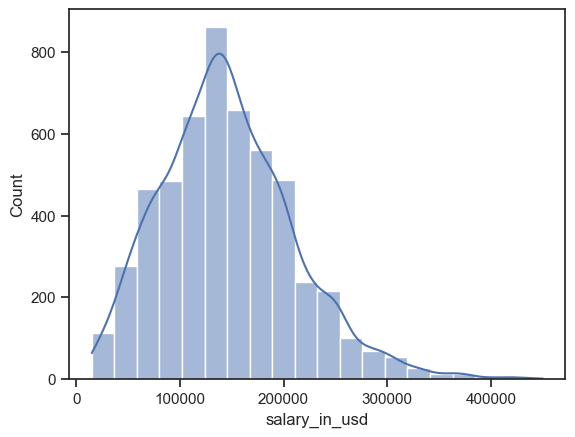

In [35]:
# Histogram for salary_in_usd

sns.histplot(df_an['salary_in_usd'], bins = 20, kde = True)

This is encouraging.  Most people are making over 100,000 USD.

I can make catplots for all kinds of things without having to create the categories.  For example, let's see how experience level compares to salary.

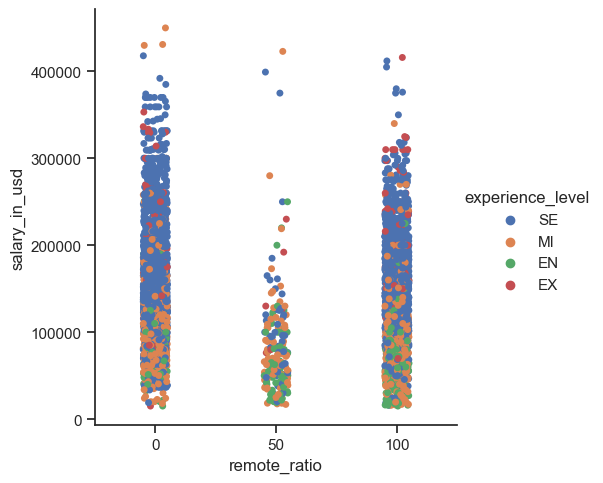

In [36]:
sns.set(style = 'ticks')
catplot_1 = sns.catplot(x = 'remote_ratio', y = 'salary_in_usd', hue = 'experience_level', data=df_an)